In [1]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
rng = core.GSLRandomNumberGenerator()

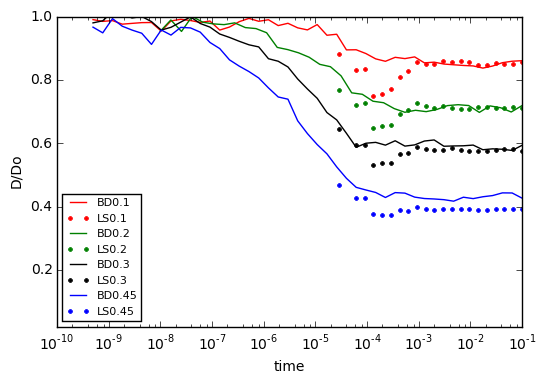

In [5]:
f2,ax2 = plt.subplots(1)

phis = [0.1,0.2,0.3,0.45]

def plotmsd1(phi):
    dat = np.loadtxt('data/2Dcrowding_BDmoc_phi'+str(phi)+'.csv',delimiter=',')   
    msd = dat[:,1]
    t = dat[:,0]
    D = 1
    Dt = msd[1:]/t[1:]/4./D
    ax2.semilogx(t[1:],Dt,'-',color=c,label='BD'+str(phi))
    return 

def plotmsd2(phi):
    dat = np.loadtxt('data/2Dcrowding_LS_mobilecrowder_phi'+str(phi)+'rv=1.079rm.csv',delimiter=',')   
    msd = dat[:,1]
    t = dat[:,0]
    D = 1
    Dt = msd[1:]/t[1:]/4./D
    ax2.semilogx(t[1:],Dt,'.',color=c,label='LS'+str(phi))
    return 

de = []
clrs = ['r','g','k','b','m']
for p,c in zip(phis,clrs):
    plotmsd1(p)
    plotmsd2(p)
    
ymin = 0.02
ymax = 1.
ax2.set_ylim(ymin,ymax)
#ax2.set_yticks(np.arange(ymin,ymax,0.1))
ax2.set_xlabel("time")
ax2.set_ylabel("D/Do")    
ax2.legend(loc='best',fontsize='8')  
#f2.savefig("figure/2DLSBD_immobileCrowders_Deff_t.png",format='png',dpi=200)

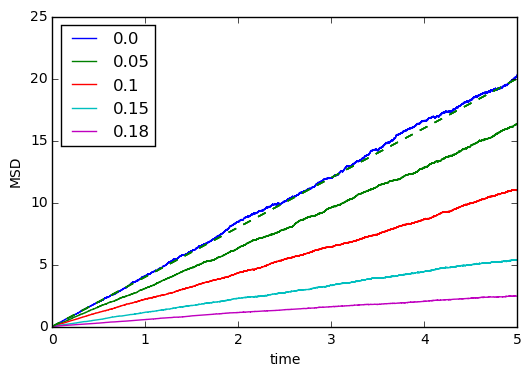

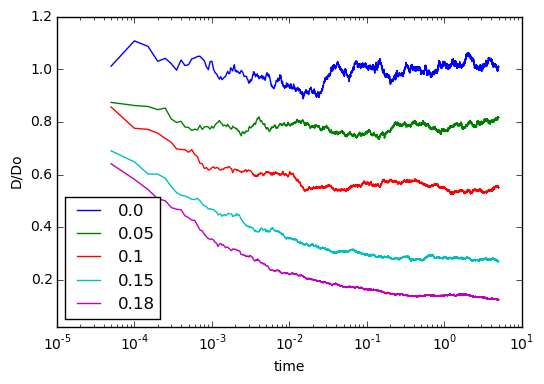

In [3]:
f1,ax1 = plt.subplots(1)
f2,ax2 = plt.subplots(1)

phis = [0.0,0.05,0.1,0.15,0.18]

def plotmsd(phi):
    #dat = np.loadtxt('data/BDphi'+str(phi)+'/2Dcrowding_BD_phi'+str(phi)+'.csv',delimiter=',')  
    dat = np.loadtxt('data/2Dcrowding_BD_phi'+str(phi)+'_run2.csv',delimiter=',')   
    msd = dat[:,1]
    t = dat[:,0]
    ax1.plot(t,msd,label=str(phi))
    D = 1
    ax1.plot(t,4*D*t,'g--')
    Dt = msd[1:]/t[1:]/4./D
    ax2.semilogx(t[1:],Dt,label=str(phi))
    deff = Dt[(t>1)[1::]]
    return np.mean(deff)

de = []
for p in phis:
    mean = plotmsd(p)
    de.append(mean)
    ax1.set_xlabel("time")
    ax1.set_ylabel("MSD")  
    ymin = 0.02
    ymax = 1.2
    ax2.set_ylim(ymin,ymax)
    #ax2.set_yticks(np.arange(ymin,ymax,0.1))
    ax2.set_xlabel("time")
    ax2.set_ylabel("D/Do")    
    ax1.legend(loc='best')
    ax2.legend(loc='best')  


In [85]:
f1.savefig("figure/2DBD_diffusion_MSD_t.png",format='png',dpi=100)    
f2.savefig("figure/2DBD_diffusion_Deff_t.png",format='png',dpi=100)

In [86]:
print phis
print de

[0.0, 0.05, 0.1, 0.15, 0.18]
[1.020959654840458, 0.79662875354227425, 0.53997327720400301, 0.27771066456853133, 0.13324651239743301]


phi [0.0, 0.05, 0.1, 0.15, 0.18]
Deff [1.020959654840458, 0.79662875354227425, 0.53997327720400301, 0.27771066456853133, 0.13324651239743301]


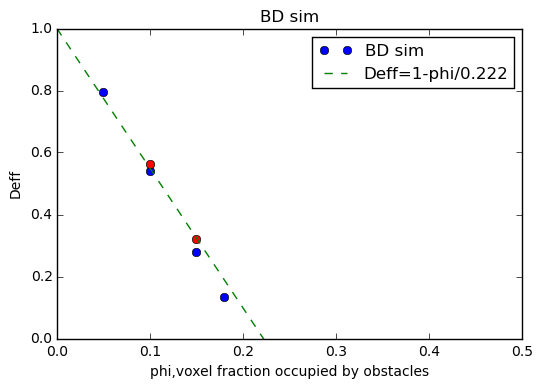

In [13]:
import scipy
from scipy.optimize import curve_fit
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

#de = [0.94830140592077317, 0.67515725372187418, 0.42724170618727503, 0.20667644039049163, 0.081817752936242369, 0.032423098951908771]
#phis = [0.0, 0.05, 0.1, 0.15, 0.18, 0.2]

def lin(x,m,c):
    return m*x+c 
c1,c2 = curve_fit(lin,phis,de)
#plt.plot(xx,[c1[0]*i+c1[1] for i in xx],'--',label='BD sim fit')
plt.plot(phis,de,'o',label='BD sim')
plt.plot([0.1,0.15],[0.564,0.32],'ro')
xx = np.linspace(phis[0],0.24,10)
#plt.plot(xx,[c1[0]*i+c1[1] for i in xx],'--',label='BD sim fit')
phic = 0.222
plt.plot(xx,[(-1./phic)*i+1. for i in xx],'--',label='Deff=1-phi/'+str(phic))
plt.title('BD sim')
plt.xlabel('phi,voxel fraction occupied by obstacles')
plt.ylabel('Deff')
plt.xlim(0,0.5)
plt.ylim(0.0,1)
plt.legend()
print 'phi',phis
print 'Deff',de
#print 'phic=',-1./slope
#plt.savefig("figure/2DBD_diffusion_Deff_phi.png",format='png',dpi=100)
plt.show()

In [67]:
1./0.245

4.081632653061225

# 